# Análisis de Regresión III

Para abrirlo con Google Colab: <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clase13_AnalisisDeRegresionIII.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [ ]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 MB 7.4 MB/s eta 0:00:00


## Inferencia de la Regresión

Es posible realizar inferencia sobre una variable explicativa de la regresión para evaluar su importancia sobre la variable respuesta.

- $H_0$: $\beta_1 = 0$
- $H_a$: $\beta_1 \neq 0$

De esta forma, se puede evaluar si existe significancia a la hora de evaluar la relación entre una variable con otra.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm


data = {
    "hc": [0.99, 1.02, 1.15, 1.29, 1.46, 1.36, 0.87, 1.23, 1.55, 1.40,
           1.19, 1.15, 0.98, 1.01, 1.11, 1.20, 1.26, 1.32, 1.43, 0.95],
    "pureza": [90.01, 89.05, 91.43, 93.74, 96.73, 94.45, 87.59, 91.77,
               99.42, 93.65, 93.54, 92.52, 90.56, 89.54, 89.85, 90.39,
               93.25, 93.41, 94.98, 87.33]
}

df = pd.DataFrame(data)

lm_pureza = sm.OLS(df["pureza"], sm.add_constant(df[["hc"]])).fit()
print(lm_pureza.summary())



                            OLS Regression Results                            
Dep. Variable:                 pureza   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     128.9
Date:                Sat, 03 May 2025   Prob (F-statistic):           1.23e-09
Time:                        02:08:32   Log-Likelihood:                -28.985
No. Observations:                  20   AIC:                             61.97
Df Residuals:                      18   BIC:                             63.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.2833      1.593     46.617      0.0

In [3]:
### Calculamos el RSE
RSE = np.sqrt(np.sum(lm_pureza.resid**2)/lm_pureza.df_resid)
print(RSE)

1.086529052513868


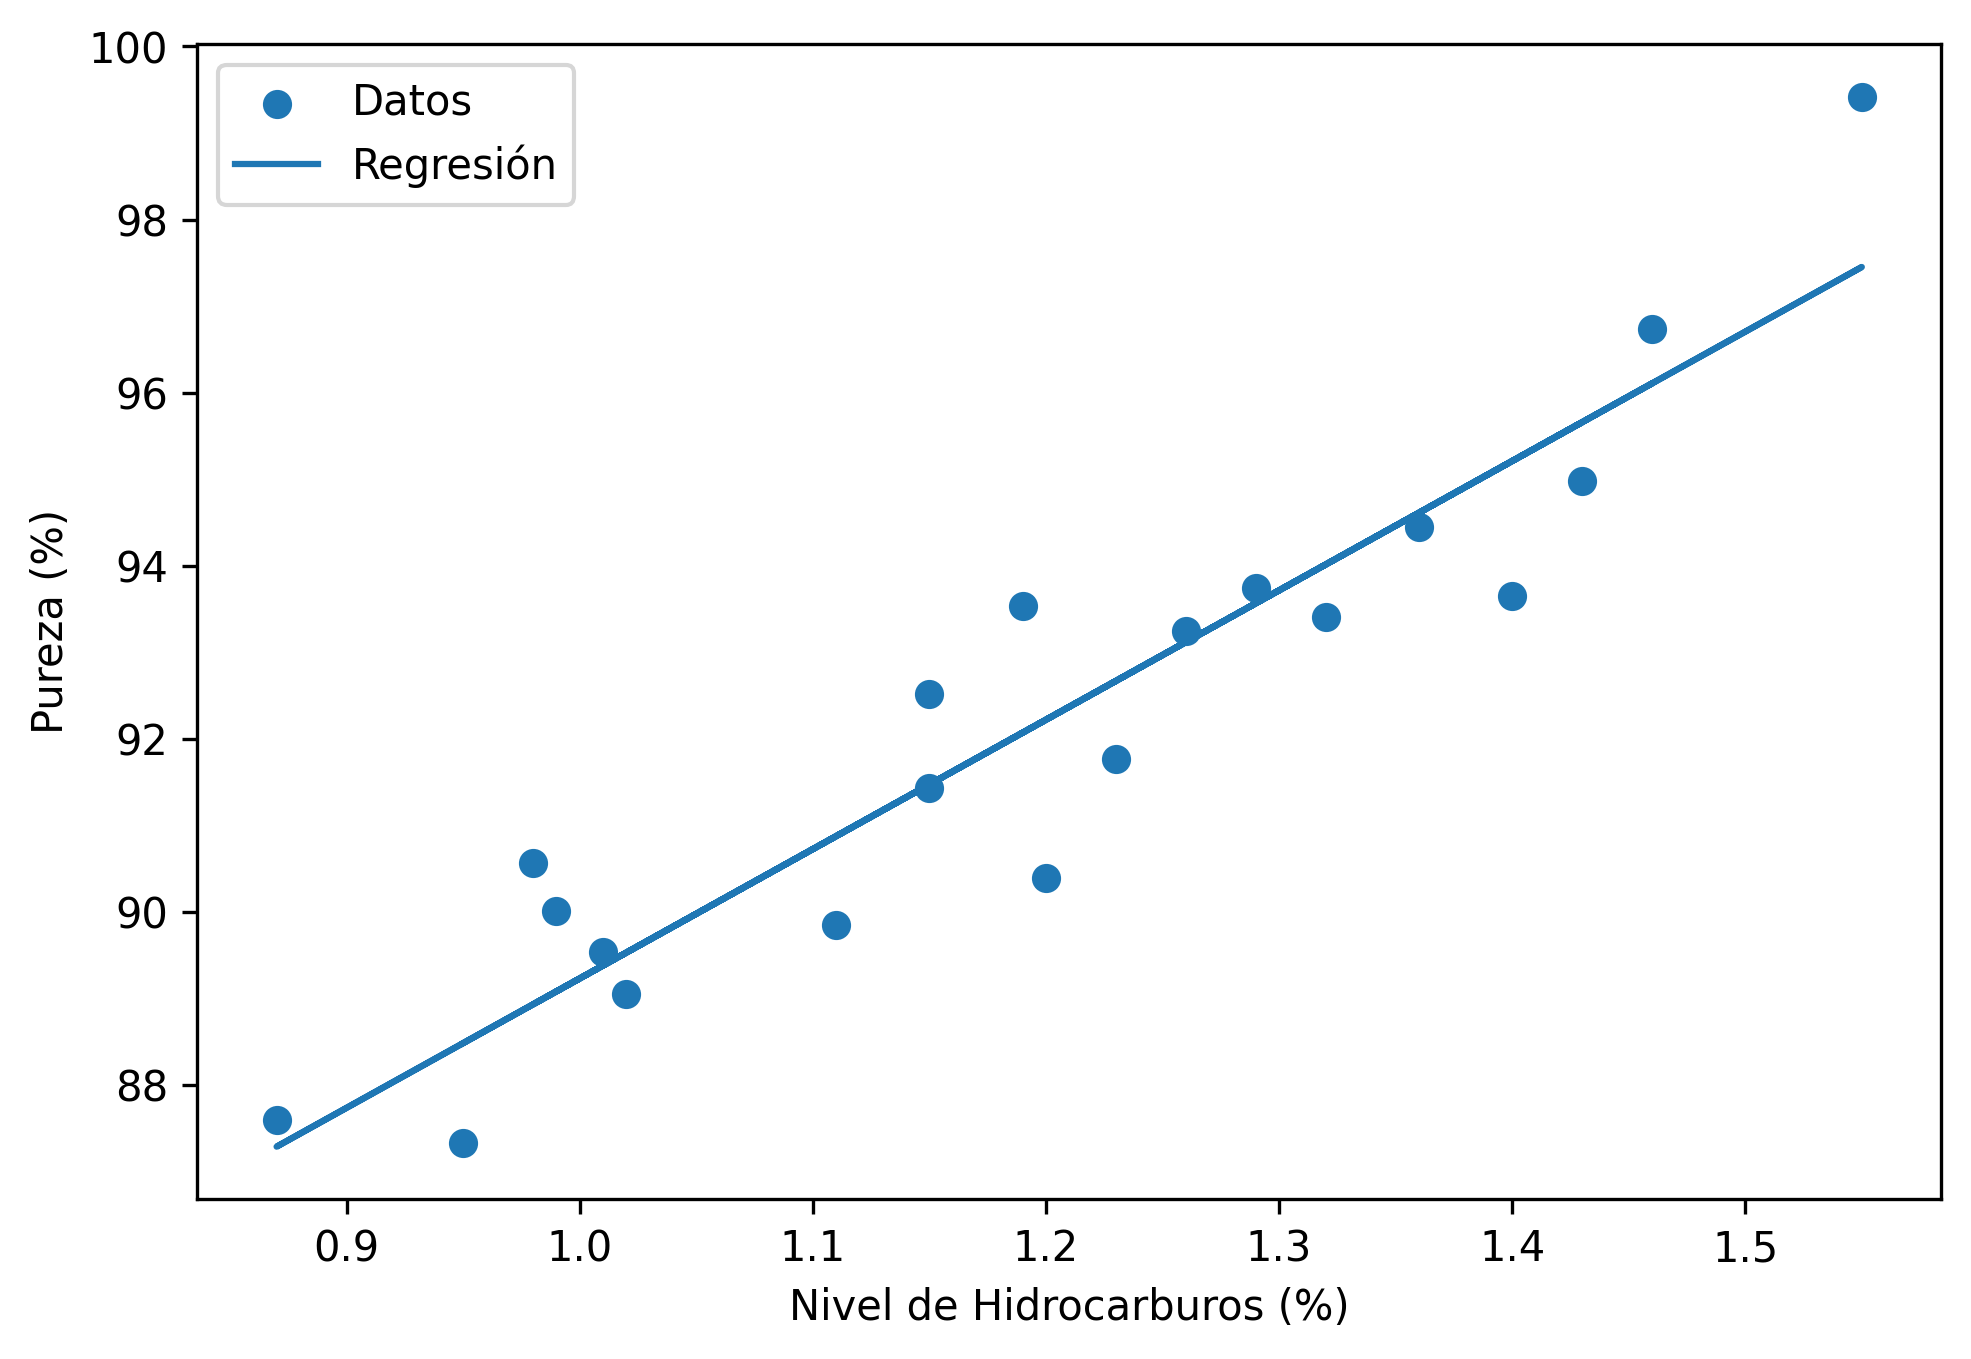

In [4]:

reg_line = lm_pureza.params['hc'] * df["hc"] + lm_pureza.params['const']

fig, ax = plt.subplots(figsize = (7.5,5), dpi = 300)
ax.scatter(df["hc"], df["pureza"], label = 'Datos', zorder = 3)
ax.plot(df["hc"], reg_line, label = 'Regresión', zorder = 3)

ax.set_xlabel('Nivel de Hidrocarburos (%)')
ax.set_ylabel('Pureza (%)')

ax.legend()


En este blog se pueden encontrar muchos más ejemplos de los diferentes análisis que se pueden hacer a través del análisis de regresión:
- https://emredjan.medium.com/emulating-r-regression-plots-in-python-43741952c034


### Datos sin Asociación

Analicemos ahora los datos sin asociación:

In [ ]:
import pandas as pd
from io import StringIO
data_str = """x,y
5.632953933071785,10.26652558473546
14.292682432860898,-5.736260651285763
13.356985188949468,12.696818760248988
5.330982406317768,22.70905375139738
16.77968013849555,3.0381781073361234
12.128175834919137,7.047497350140256
13.55668216288333,-0.9659806893021727
6.268039011473929,16.782477489051686
3.2130396484088157,15.494212215423078
10.018495539326135,10.609811661384098
-0.5352649943969645,19.52075182520905
14.786152901557479,9.08201531808917
3.9022850372328017,0.5966595900740392
-1.4327224259260642,18.1856619740959
12.657955592107378,10.713866111408612
6.247514499132093,-7.799871791336132
7.320105651327481,-7.388795886681166
22.290017244046716,-4.225911235513507
14.879956266029538,18.49612062115048
14.130685587485363,-10.676165869471603
9.4055315094151,6.437999250599389
5.158744428990462,-3.861099941217587
-3.677161479191332,4.744258096378043
7.850455156950677,1.7226460712222904
4.8112679459574785,4.240389843631043
9.247118985641738,-8.546636300835168
9.315672391398023,-4.608088185597406
10.956248567146318,7.249543392685798
9.069628858650546,3.768395368736006
2.449382110467531,5.0104102001239985
9.730096608705459,-0.712432479238883
5.316579543842664,9.226217750232308
14.902810904294896,-11.733858102258935
22.13697995698655,-6.360259305718504
15.259043494008344,8.612124894239937
1.4065493071060562,15.568642128201585
-25.75651527544006,-14.929204528045041
12.952360165815206,12.64385053589725
11.353813530247514,5.071653485388705
-4.5775225469821095,6.0197433586368785
10.538861597599919,2.6723284443726283
10.136847693850775,-9.203631279439042
7.250725057729307,-3.133227305700867
4.6568624264675575,9.610693038179434
7.954043450140906,2.8510639042814496
6.310336331571889,6.389452481135367
21.773132659408304,13.442303618887726
9.264317466103956,-8.084503332116125
12.681554384759938,15.451686581364205
8.145083254427185,17.101739229185007"""

no_asociacion = pd.read_csv(StringIO(data_str))


In [ ]:
model_sin_asociacion = sm.OLS(no_asociacion["y"],
                              sm.add_constant(no_asociacion[["x"]])).fit()
print(model_sin_asociacion.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                 0.0005093
Date:                Fri, 02 May 2025   Prob (F-statistic):              0.982
Time:                        19:23:58   Log-Likelihood:                -182.46
No. Observations:                  50   AIC:                             368.9
Df Residuals:                      48   BIC:                             372.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4687      2.002      2.232      0.0

In [ ]:
RSE = np.sqrt(np.sum(model_sin_asociacion.resid**2) / model_sin_asociacion.df_resid)
print(RSE)

9.493237330155537


In [ ]:
model_sin_asociacion.params

,0
const,4.468652
x,0.003983


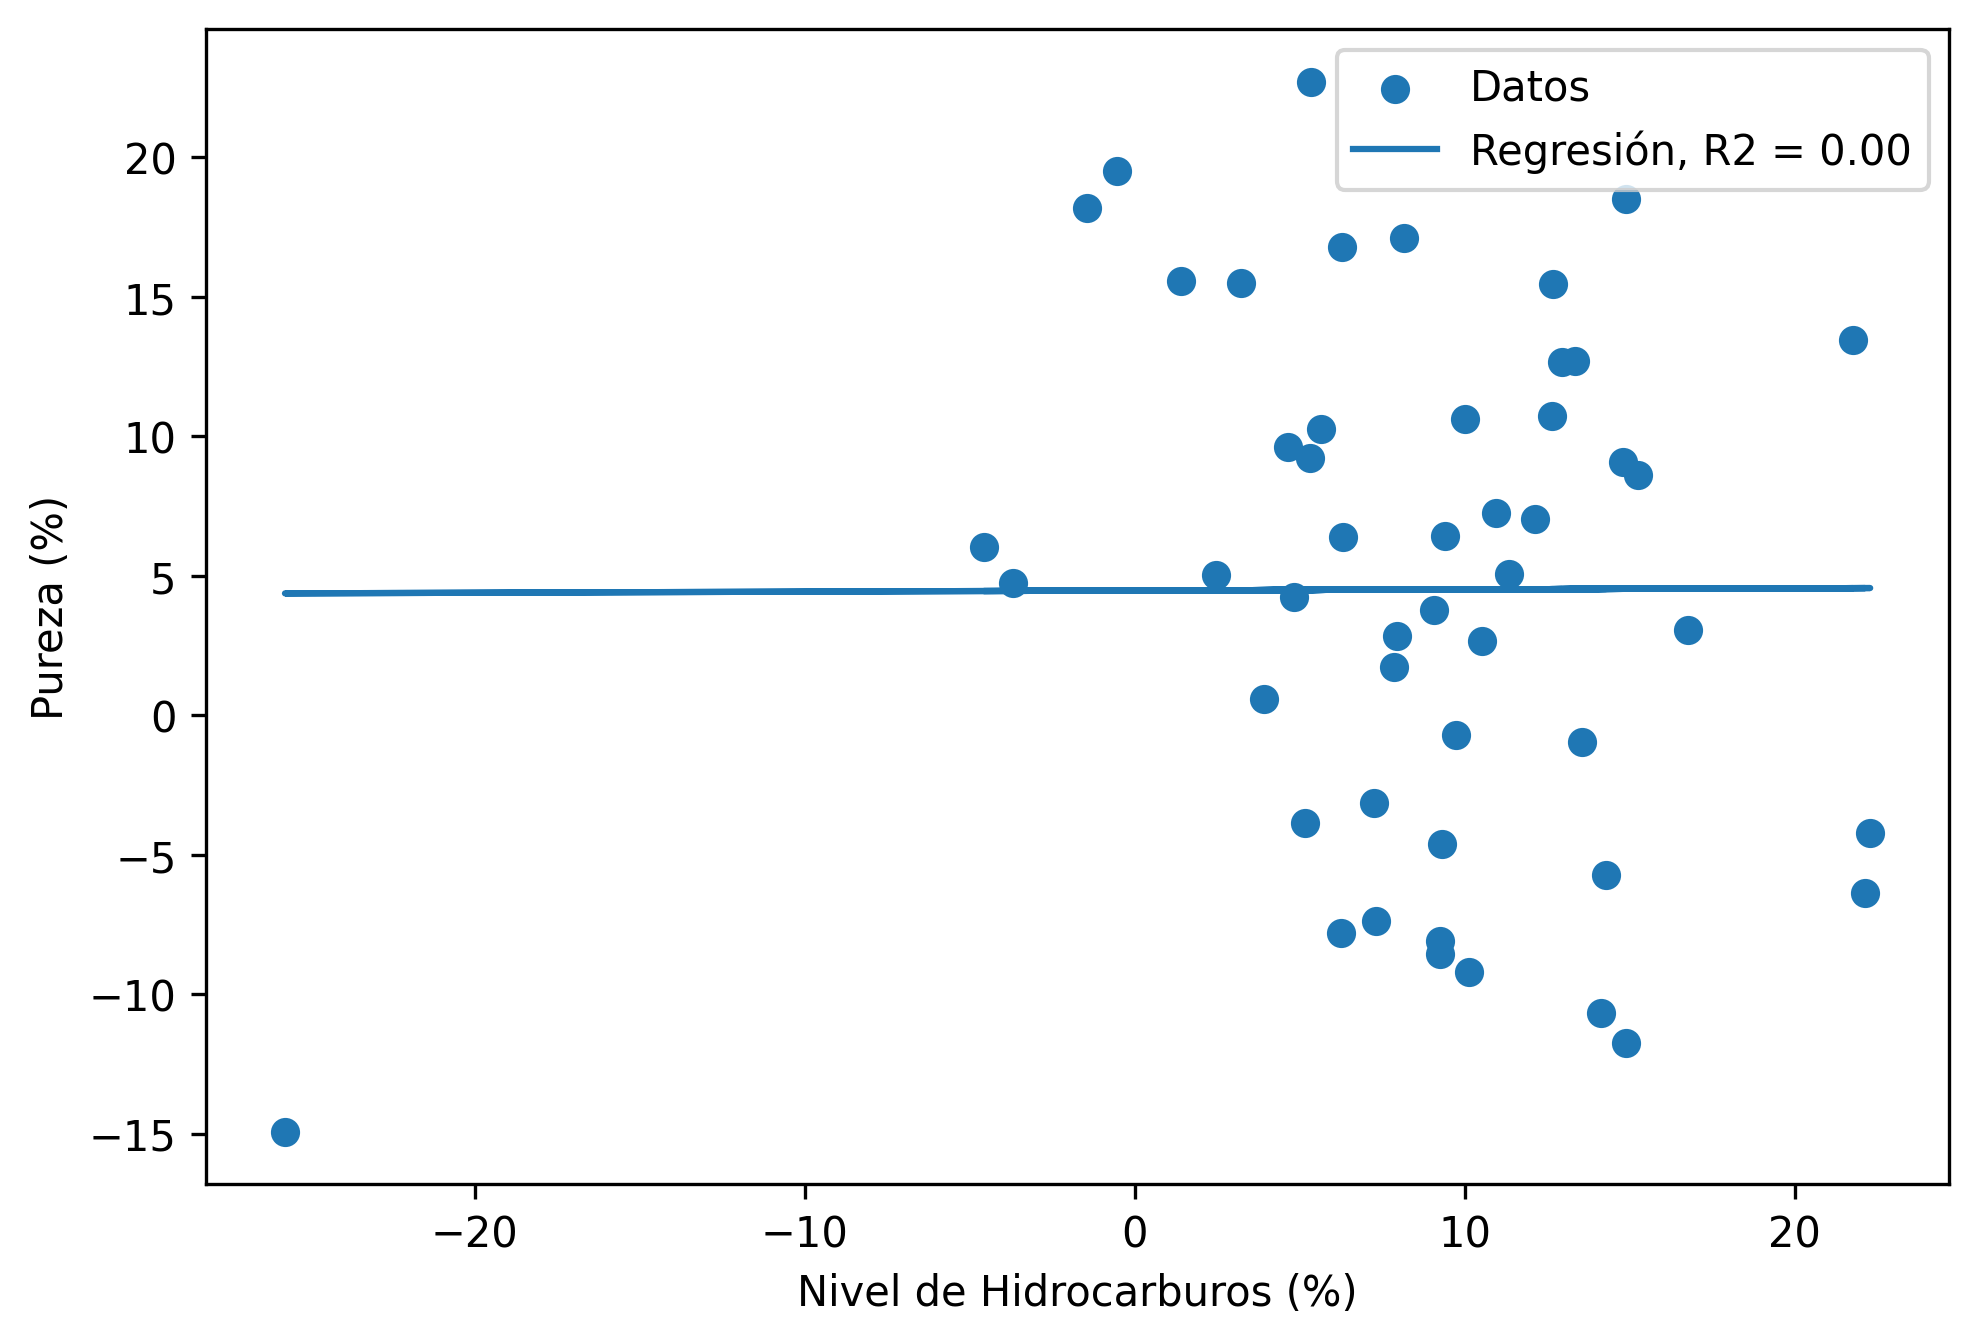

In [ ]:

fig, ax = plt.subplots(figsize = (7.5,5), dpi = 300)
ax.scatter(no_asociacion["x"], no_asociacion["y"], label = 'Datos', zorder = 3)
ax.plot(no_asociacion["x"], reg_line, label = f'Regresión, R2 = {model_sin_asociacion.rsquared:.2f}', zorder = 3)


ax.set_xlabel('Nivel de Hidrocarburos (%)')
ax.set_ylabel('Pureza (%)')
ax.legend()
ax.legend()


## ANOVA para regresión

Ya teniendo el ajuste de regresión lineal previamente realizado, es posible hacer un análisis ANOVA de la siguiente forma:

In [ ]:
modelo_pureza_anova.model

In [ ]:
from statsmodels.formula.api import ols
"""
### IMPORTANTE###
# notar que aqui la funcion para generar la regresión es diferente a la anterior
# la anterior es para hacer la regresión y análisis posteriores
# esta sirve para generar el test de anova, son ciertas sutilizas del paquete
# statsmodels
"""

print('ANOVA del modelo lineal')
print('----')
print(sm.stats.anova_lm(modelo_pureza_anova))
print('----\n')

print('\nANOVA del modelo nulo vs modelo lineal')
print('----')

modelo_pureza_anova = ols('pureza~hc', data = df).fit()
modelo_nulo_anova = ols('pureza~1', data = df).fit()
print(sm.stats.anova_lm(modelo_nulo_anova, modelo_pureza_anova))

print('----')

ANOVA del modelo lineal
----
            df      sum_sq     mean_sq           F        PR(>F)
hc         1.0  152.127078  152.127078  128.861694  1.227314e-09
Residual  18.0   21.249817    1.180545         NaN           NaN
----


ANOVA del modelo nulo vs modelo lineal
----
   df_resid         ssr  df_diff     ss_diff           F        Pr(>F)
0      19.0  173.376895      0.0         NaN         NaN           NaN
1      18.0   21.249817      1.0  152.127078  128.861694  1.227314e-09
----
